# Bi-LSTM (FastText Embeddings)

### Libraries

In [1]:
import process_funcs as pf

import os
import pandas as pd
import numpy as np

### Parameters

In [2]:
max_len = 500 # maximum length of input vectors
max_words = 15000 # top n words in vocab 

### Reading Data

In [3]:
train_x, test_x, train_y, test_y, label_map  = pf.get_train_test()

In [4]:
#Sample instance
train_x[0][0:200]

['mps',
 'tout',
 'lords',
 'replacement',
 'plan',
 'group',
 'mps',
 'tried',
 'raise',
 'pressure',
 'tony',
 'blair',
 'reform',
 'house',
 'lords',
 'publishing',
 'detailed',
 'blueprint',
 'change',
 'cross',
 'party',
 'group',
 'unveiled',
 'draft',
 'bill',
 'proposing',
 'smaller',
 'second',
 'chamber',
 '70',
 'members',
 'would',
 'elected',
 'mps',
 'peers',
 'failed',
 'agree',
 'reform',
 'since',
 '1999',
 '600',
 'hereditaries',
 'lost',
 'seats',
 'group',
 'says',
 'win',
 'support',
 'removing',
 'last',
 '92',
 'hereditaries',
 'government',
 'postponed',
 'plans',
 'remove',
 'remaining',
 'hereditary',
 'peers',
 'said',
 'unlikely',
 'succeed',
 'opposition',
 'lords',
 'tony',
 'blair',
 'argued',
 'needs',
 'consensus',
 'reforms',
 'suggestions',
 'proposals',
 'changing',
 'least',
 'powers',
 'lords',
 'labour',
 'manifesto',
 'party',
 'group',
 'including',
 'tories',
 'ken',
 'clarke',
 'sir',
 'george',
 'young',
 'labour',
 'robin',
 'cook',
 'tony',

### Data Processing

In [5]:
train_x, tokenizer = pf.lstm_build_sequences(train_x, max_words, max_len)
test_x, tokenizer = pf.lstm_build_sequences(test_x, max_words, max_len, tokenizer=tokenizer)
word_index = tokenizer.word_index

list(word_index.items())[:5]

[('said', 1), ('mr', 2), ('would', 3), ('year', 4), ('also', 5)]

### Embeddings: FastText

In [6]:
embeddings_index = pf.get_fasttext_embeddings()
embeddings_index['test']

array([ 2.470e-02,  1.440e-02,  8.120e-02,  7.820e-02,  1.574e-01,
       -5.940e-02,  1.040e-02,  4.900e-02,  6.830e-02, -1.250e-02,
        4.900e-03, -1.502e-01,  3.550e-02, -2.150e-02, -7.810e-02,
        1.390e-02,  1.590e-02,  8.020e-02,  7.940e-02,  5.510e-02,
       -9.240e-02, -2.400e-03, -1.080e-02,  3.920e-02, -9.550e-02,
       -5.410e-02,  1.295e-01, -4.210e-02, -4.820e-02,  5.940e-02,
       -6.630e-02,  3.570e-02, -4.980e-02, -7.060e-02, -5.330e-02,
       -5.830e-02,  6.570e-02, -4.200e-02, -1.000e-04, -6.680e-02,
        1.077e-01,  4.500e-02,  6.790e-02,  1.968e-01, -1.050e-02,
       -1.794e-01, -1.018e-01,  8.600e-03, -1.510e-02,  3.370e-02,
       -4.600e-02,  4.870e-02, -7.331e-01, -1.660e-02, -1.825e-01,
        1.104e-01, -3.210e-02,  2.130e-02,  1.080e-02, -6.190e-02,
        5.100e-03, -4.690e-02, -1.475e-01,  1.425e-01, -2.120e-01,
       -6.640e-02, -7.300e-03,  8.390e-02,  1.497e-01, -1.082e-01,
       -2.500e-03, -2.200e-03, -1.308e-01, -6.240e-02, -3.580e

In [7]:
embedding_dim, embedding_mat = pf.lstm_build_embed_mat(embeddings_index, word_index, max_words, 300)

### Modeling

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Embedding, Flatten

#Architecture
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Bidirectional(LSTM(embedding_dim)))
model.add(Dense(5, activation='sigmoid'))
model.summary()

model.layers[0].set_weights([embedding_mat])
model.layers[0].trainable = False

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 300)          4500000   
_________________________________________________________________
bidirectional (Bidirectional (None, 600)               1442400   
_________________________________________________________________
dense (Dense)                (None, 5)                 3005      
Total params: 5,945,405
Trainable params: 5,945,405
Non-trainable params: 0
_________________________________________________________________


Train on 1072 samples, validate on 120 samples
Epoch 1/50
1072/1072 [==============================] - 8s 7ms/sample - loss: 1.6776 - acc: 0.2416 - val_loss: 1.5946 - val_acc: 0.2917
Epoch 2/50
1072/1072 [==============================] - 2s 2ms/sample - loss: 1.5985 - acc: 0.2229 - val_loss: 1.5750 - val_acc: 0.2917
Epoch 3/50
1072/1072 [==============================] - 3s 2ms/sample - loss: 1.5371 - acc: 0.3116 - val_loss: 2.1031 - val_acc: 0.1917
Epoch 4/50
1072/1072 [==============================] - 3s 2ms/sample - loss: 1.6893 - acc: 0.2799 - val_loss: 1.5291 - val_acc: 0.2917
Epoch 5/50
1072/1072 [==============================] - 3s 3ms/sample - loss: 1.3638 - acc: 0.4356 - val_loss: 1.4275 - val_acc: 0.4500
Epoch 6/50
1072/1072 [==============================] - 3s 3ms/sample - loss: 1.4050 - acc: 0.5056 - val_loss: 1.0430 - val_acc: 0.6083
Epoch 7/50
1072/1072 [==============================] - 3s 2ms/sample - loss: 1.0649 - acc: 0.6110 - val_loss: 1.2706 - val_acc: 0.4500
E

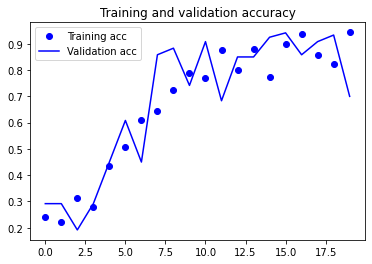

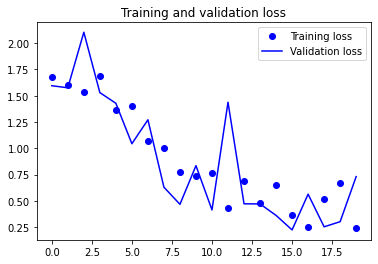

In [9]:
#Training
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import Callback, EarlyStopping

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
earlystopping = EarlyStopping(monitor = "val_loss", 
                                mode = "min", patience = 5, 
                                restore_best_weights = True)
history = model.fit(train_x, train_y.values,
                    epochs=50,
                    batch_size=128,
                    validation_split=0.1, 
                    callbacks=[earlystopping])
accuracy, f1_score = pf.lstm_plot(model, history, test_x, test_y)

In [11]:
pf.store_results('bilstm', 'fasttext', model, accuracy, f1_score, tf_model=1)

INFO:tensorflow:Assets written to: models/bilstm-fasttext\assets
